In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('ford.csv')

In [3]:
#pd.set_option('display.max_rows', None)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


# Business Statement

By using this features, we have to predict car price

In [6]:
data['price']= data['price']* 81.77

In [7]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,981240.00,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,1144780.00,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,1063010.00,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,1430975.00,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,1349205.00,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,735848.23,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,613193.23,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,817618.23,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,678609.23,Manual,5007,Petrol,145,57.7,1.2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  float64
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [9]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,1.796600e+04,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,1.004098e+06,23362.608761,113.329456,57.906980,1.350807
std,2.050336,3.876997e+05,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,4.047615e+04,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,7.358482e+05,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,9.232651e+05,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,1.250999e+06,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,4.496941e+06,177644.000000,580.000000,201.800000,5.000000


In [10]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
data.describe(include='O')

,model,transmission,fuelType
count,17966,17966,17966
unique,24,3,5
top,Fiesta,Manual,Petrol
freq,6557,15518,12179


In [12]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,981240.0,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,1144780.0,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,1063010.0,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,1430975.0,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,1349205.0,Automatic,1482,Petrol,145,48.7,1.0


In [13]:
data.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,735848.23,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,613193.23,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,817618.23,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,678609.23,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,678609.23,Manual,5007,Petrol,22,57.7,1.0


In [14]:
data.shape

(17966, 9)

In [15]:
data.duplicated().sum()

154

In [16]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,981240.00,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,1144780.00,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,1063010.00,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,1430975.00,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,1349205.00,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,735848.23,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,613193.23,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,817618.23,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,678609.23,Manual,5007,Petrol,145,57.7,1.2


In [17]:
import sweetviz as sv

In [18]:
my_report = sv.analyze(data)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
categorical_data=data[['model','transmission','fuelType']]
numerical_data=data[['year','price','mileage','tax','mpg','engineSize']]

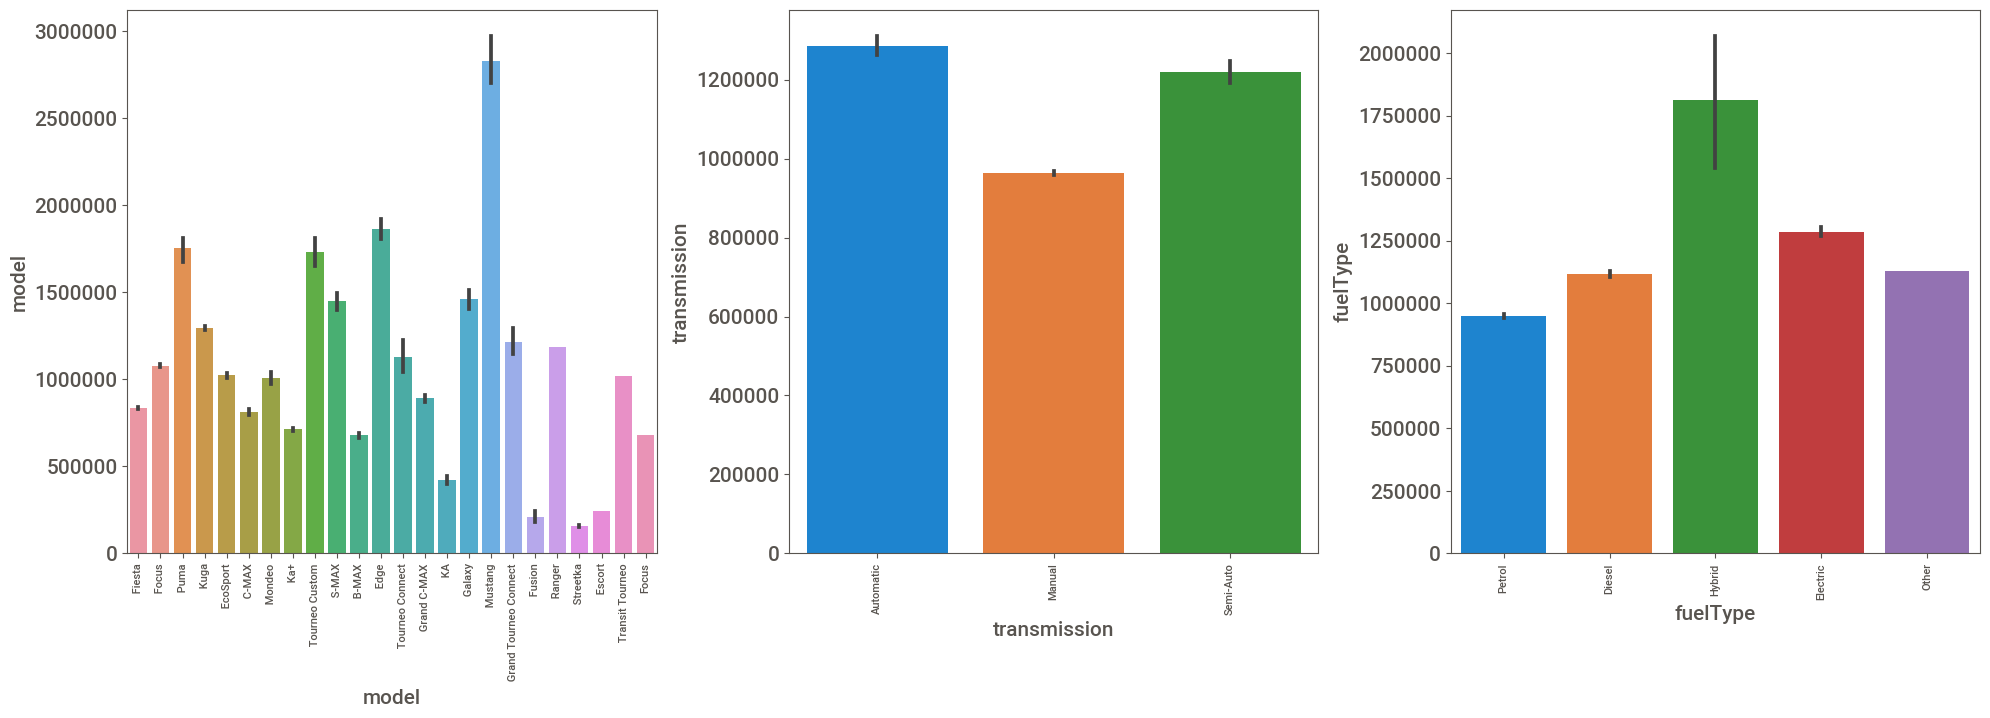

In [20]:
#plotting numerical data
plt.figure(figsize=(20,20))   #plotting the figure
plotnumber=1                  #plotnumber
for i in categorical_data:
    plt.subplot(3,3,plotnumber)                               #subplot
    sns.barplot(data=categorical_data,x=i,y=data['price'])    #using barplot for the data
    plotnumber+=1                                             #plotnumber increment
    plt.xticks(rotation=90)
    plt.yticks(fontsize=15)
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
plt.tight_layout()

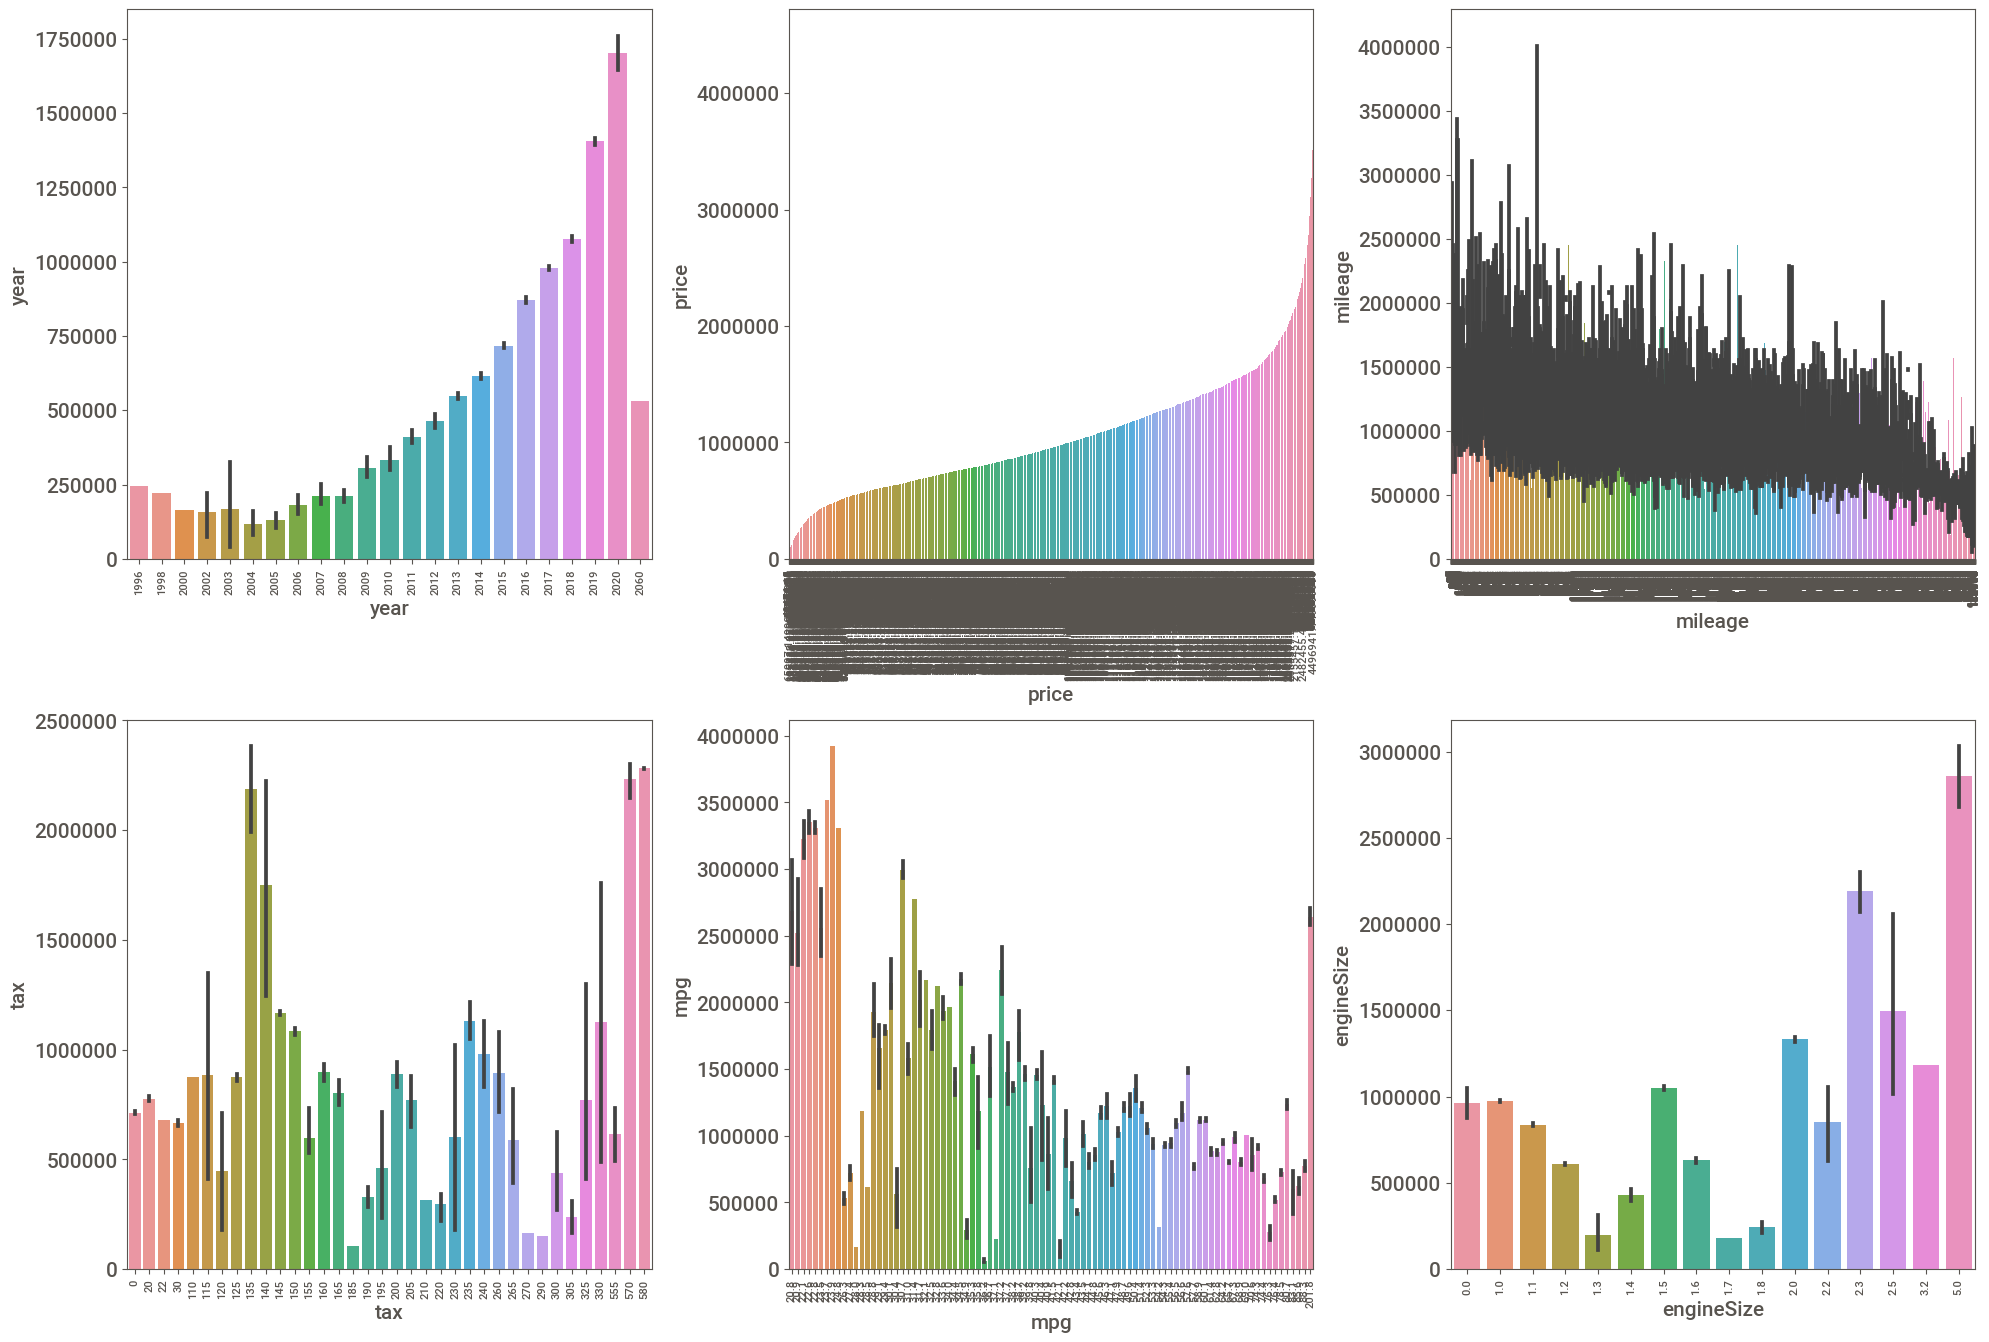

In [21]:
plt.figure(figsize=(20,20))
plotnumber=1

for i in numerical_data:
    plt.subplot(3,3, plotnumber)
    sns.barplot(data=numerical_data, x=i, y=data['price'])
    plotnumber+=1
    plt.xticks(rotation=90)
    plt.yticks(fontsize=15)
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
plt.tight_layout()

In [22]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

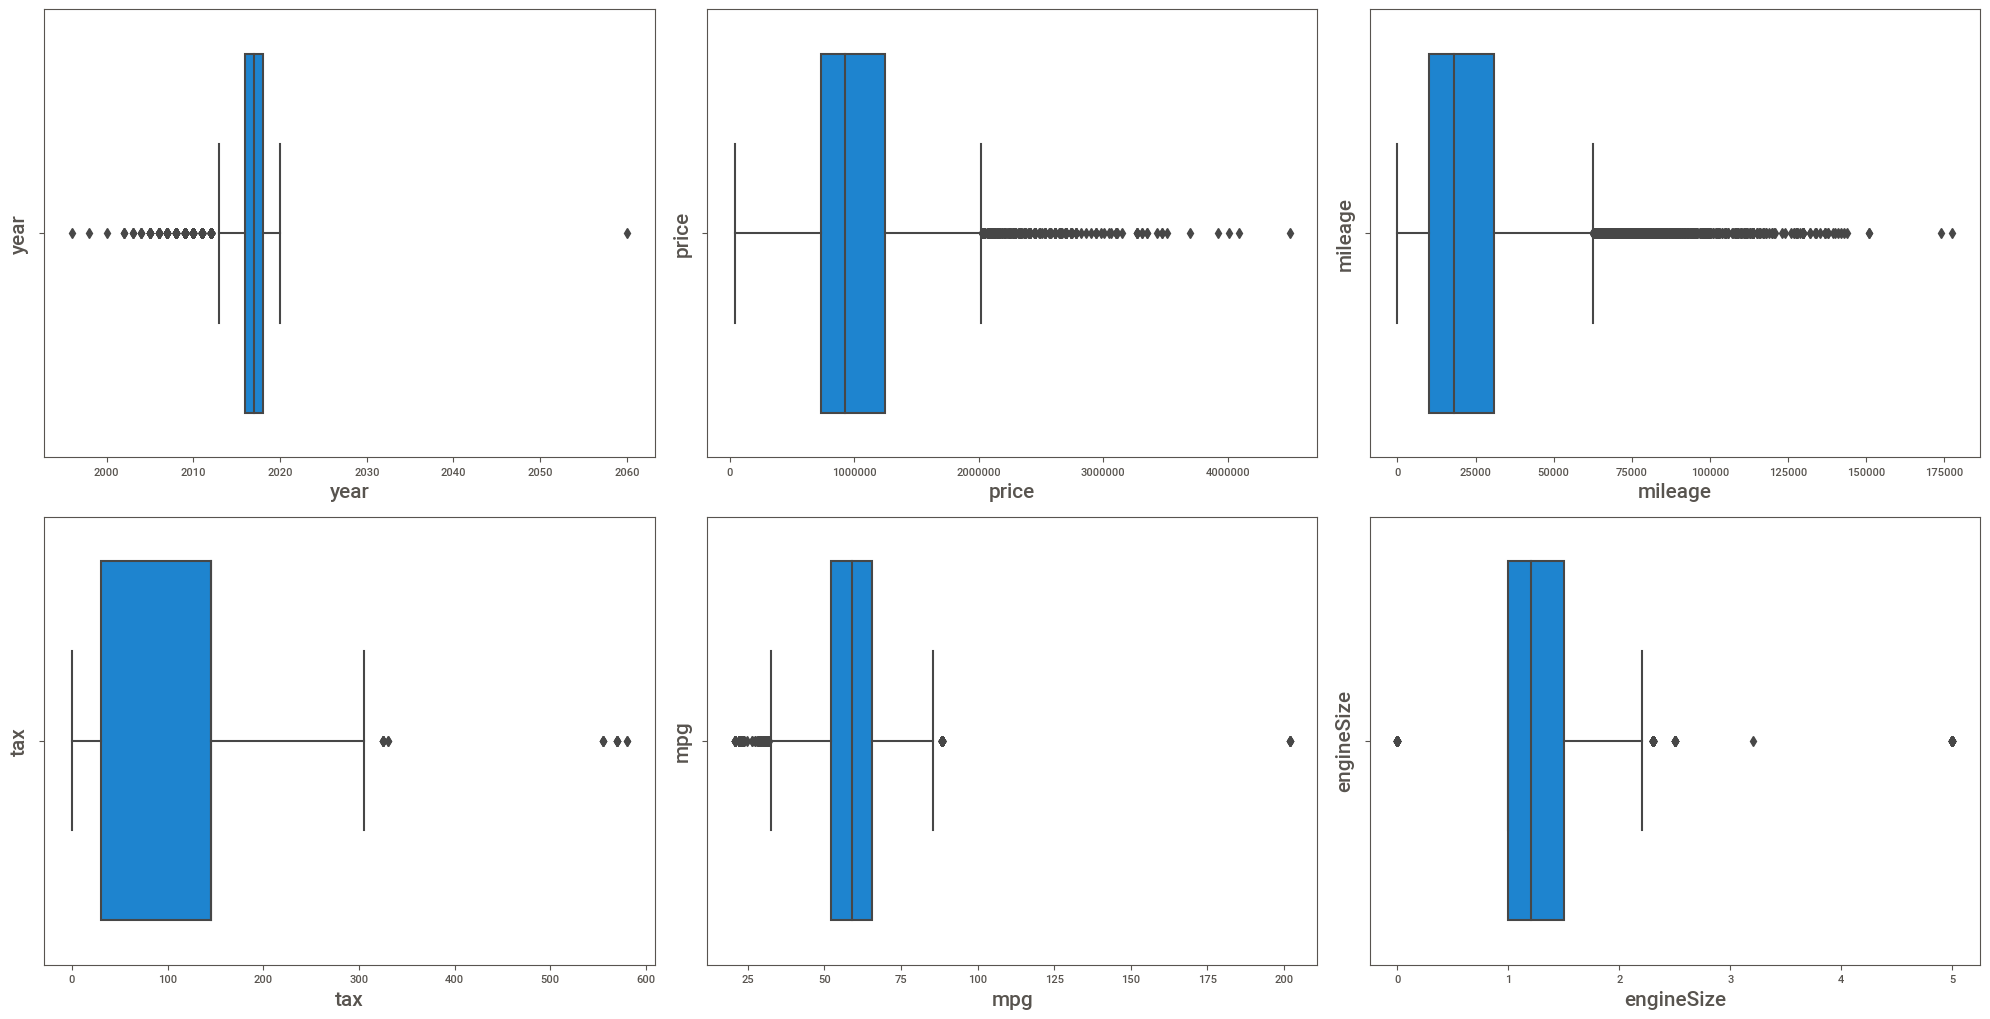

In [23]:
plt.figure(figsize=(20,20))
plotnumber= 1

for i in numerical_data:
    plt.subplot(4,3, plotnumber)
    sns.boxplot(data= numerical_data, x=i)
    plotnumber+=1
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
plt.tight_layout()

In [24]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.model=lc.fit_transform(data.model)   #model','transmission','fuelType

In [25]:
data.transmission=lc.fit_transform(data.transmission)
data.fuelType=lc.fit_transform(data.fuelType)

In [26]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,981240.00,0,15944,4,150,57.7,1.0
1,6,2018,1144780.00,1,9083,4,150,57.7,1.0
2,6,2017,1063010.00,1,12456,4,150,57.7,1.0
3,5,2019,1430975.00,1,10460,4,145,40.3,1.5
4,5,2019,1349205.00,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,0,2017,735848.23,1,16700,4,150,47.1,1.4
17962,0,2014,613193.23,1,40700,4,30,57.7,1.0
17963,6,2015,817618.23,1,7010,0,20,67.3,1.6
17964,11,2018,678609.23,1,5007,4,145,57.7,1.2


In [27]:
data.fuelType.unique()

array([4, 0, 2, 1, 3])

In [28]:
data.model.unique()

array([ 5,  6, 16, 13,  2,  1, 14, 12, 21, 18,  0,  3, 20,  9, 11,  8, 15,
       10,  7, 17, 19,  4, 22, 23])

In [29]:
data.transmission.unique()

array([0, 1, 2])

In [30]:
data.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.030241,0.314736,-0.063395,0.078765,-0.388704,0.183490,-0.221959,0.500365
year,0.030241,1.000000,0.636009,-0.017120,-0.707818,0.087954,0.298506,-0.022967,-0.137311
price,0.314736,0.636009,1.000000,-0.058034,-0.530659,-0.202855,0.406857,-0.346419,0.411178
transmission,-0.063395,-0.017120,-0.058034,1.000000,0.016649,-0.005116,-0.053305,0.056084,-0.026486
mileage,0.078765,-0.707818,-0.530659,0.016649,1.000000,-0.257557,-0.260451,0.120075,0.215035
fuelType,-0.388704,0.087954,-0.202855,-0.005116,-0.257557,1.000000,0.129586,-0.297796,-0.644619
tax,0.183490,0.298506,0.406857,-0.053305,-0.260451,0.129586,1.000000,-0.502980,0.184363
mpg,-0.221959,-0.022967,-0.346419,0.056084,0.120075,-0.297796,-0.502980,1.000000,-0.260521
engineSize,0.500365,-0.137311,0.411178,-0.026486,0.215035,-0.644619,0.184363,-0.260521,1.000000


<AxesSubplot:>

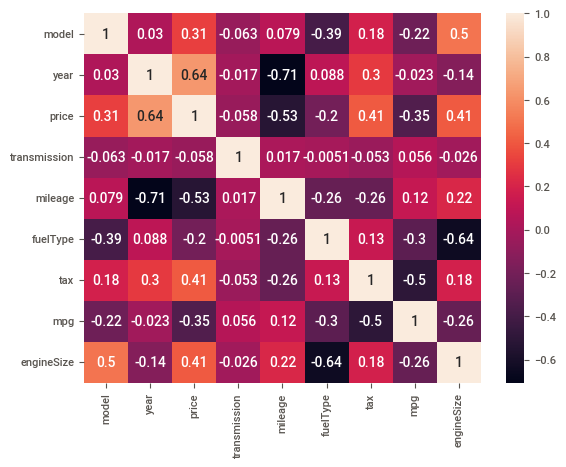

In [31]:
sns.heatmap(data.corr(), annot= True)

In [32]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [33]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]=scale.fit_transform(data[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']])

In [34]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.217391,0.328125,0.211101,0.0,0.089747,1.0,0.258621,0.203867,0.20
1,0.260870,0.343750,0.247798,0.5,0.051125,1.0,0.258621,0.203867,0.20
2,0.260870,0.328125,0.229450,0.5,0.070113,1.0,0.258621,0.203867,0.20
3,0.217391,0.359375,0.312018,0.5,0.058877,1.0,0.250000,0.107735,0.30
4,0.217391,0.359375,0.293670,0.0,0.008337,1.0,0.250000,0.154144,0.20
...,...,...,...,...,...,...,...,...,...
17961,0.000000,0.328125,0.156037,0.5,0.094003,1.0,0.258621,0.145304,0.28
17962,0.000000,0.281250,0.128514,0.5,0.229106,1.0,0.051724,0.203867,0.20
17963,0.260870,0.296875,0.174385,0.5,0.039456,0.0,0.034483,0.256906,0.32
17964,0.478261,0.343750,0.143193,0.5,0.028180,1.0,0.250000,0.203867,0.24


In [35]:
x=data[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize']]

In [36]:
y=data['price']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [38]:
x_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
3678,0.217391,0.328125,0.5,0.110165,1.0,0.250000,0.248066,0.20
13528,0.260870,0.296875,0.5,0.084090,1.0,0.250000,0.149724,0.32
14204,0.043478,0.312500,0.5,0.191389,0.0,0.034483,0.265746,0.30
6467,0.260870,0.328125,0.5,0.163243,0.0,0.250000,0.295580,0.30
20,0.217391,0.343750,0.5,0.114831,1.0,0.250000,0.191160,0.22
...,...,...,...,...,...,...,...,...
11284,0.086957,0.343750,0.5,0.054035,1.0,0.250000,0.185083,0.20
11964,0.260870,0.343750,0.5,0.078455,1.0,0.250000,0.114365,0.40
5390,0.260870,0.343750,0.5,0.088115,0.0,0.250000,0.295580,0.30
860,0.565217,0.328125,1.0,0.150088,0.0,0.250000,0.185083,0.40


In [39]:
x_test

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
17610,0.217391,0.281250,0.5,0.122673,1.0,0.000000,0.248066,0.20
7076,0.217391,0.328125,0.5,0.163356,1.0,0.258621,0.248066,0.20
1713,0.260870,0.296875,0.5,0.259813,0.0,0.034483,0.256906,0.32
1611,0.000000,0.265625,0.5,0.242256,1.0,0.051724,0.191160,0.20
16830,0.608696,0.203125,0.5,0.444707,0.0,0.344828,0.154144,0.36
...,...,...,...,...,...,...,...,...
275,0.260870,0.312500,0.5,0.245560,1.0,0.034483,0.224309,0.20
10945,0.217391,0.359375,0.5,0.038245,1.0,0.250000,0.197238,0.20
3576,0.260870,0.343750,0.5,0.112073,1.0,0.250000,0.169061,0.30
8670,0.260870,0.343750,0.5,0.260551,1.0,0.258621,0.114365,0.40


In [40]:
y_train

3678     0.174220
13528    0.118991
14204    0.179725
6467     0.192752
20       0.165211
           ...   
11284    0.264294
11964    0.330275
5390     0.210183
860      0.284459
15795    0.168899
Name: price, Length: 13474, dtype: float64

In [41]:
y_test

17610    0.119266
7076     0.156037
1713     0.137670
1611     0.091670
16830    0.060459
           ...   
275      0.156018
10945    0.225761
3576     0.243945
8670     0.280642
12663    0.284495
Name: price, Length: 4492, dtype: float64

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13474, 8)
(4492, 8)
(13474,)
(4492,)


In [43]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train) #fit the values

LinearRegression()

In [44]:
LR.predict(x_test)

array([0.10377778, 0.16232116, 0.1649629 , ..., 0.26054399, 0.28678731,
       0.22908256])

In [45]:
y_pred=LR.predict(x_test)
y_pred

array([0.10377778, 0.16232116, 0.1649629 , ..., 0.26054399, 0.28678731,
       0.22908256])

In [46]:
LR.coef_

array([ 0.01137973,  1.37792766, -0.01073765, -0.20708913, -0.02574027,
        0.00919479, -0.35973664,  0.37235947])

In [47]:
LR.intercept_

-0.21495823801671735

In [48]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score=r2_score(y_test,y_pred)

In [49]:
r2_score

0.7264154132038376

In [50]:
mse=mean_squared_error(y_test,y_pred)
mse

0.002104817079468431

In [51]:
mse=mean_absolute_error(y_test,y_pred)
mse

0.03264373286205433

In [52]:
import math
rmse=math.sqrt(mse)
rmse

0.18067576722420284

In [53]:
adjusted_r2=1-(1-r2_score)*(40-1)/(40-3-1)
adjusted_r2

0.7036166976374907

In [54]:
from sklearn.neighbors import KNeighborsRegressor    #importing KNN Regressor
KNR=KNeighborsRegressor()                            #object creation for KNN regressor
KNR.fit(x_train,y_train) 

KNeighborsRegressor()

In [55]:
y_pred=KNR.predict(x_test)     #predicting x_test data
y_pred

array([0.14315229, 0.14970642, 0.13813578, ..., 0.21444037, 0.27342018,
       0.27084404])

In [56]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error     #importing evaluation metrics
r2_score=r2_score(y_test,y_pred)                                                #r2_score of KNN regressor
r2_score

0.9082953906765973

In [57]:
mse=mean_squared_error(y_test,y_pred)    #mean_square_error of KNN regressor
mse 

0.0007055274210812586

In [58]:
mae=mean_absolute_error(y_test,y_pred)   #mean_absolute_error of KNN regressor
mae

0.01698376481737156

In [59]:
import math
rmse=math.sqrt(mse)    #rmse value of KNN regressor
rmse

0.026561766151392465

In [60]:
adjusted_r2=1-(1-r2_score)*(50-1)/(50-25-1)    ##adjusted r2 score of KNN regressor
adjusted_r2

0.8127697559647195

In [61]:
from xgboost import XGBRegressor         #importing XGB regressor
xgb_r=XGBRegressor()                     #object creation for XGB regressor
xgb_r.fit(x_train,y_train)               #fitting training data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
y_pred=xgb_r.predict(x_test)   #predicting x_test data
y_pred

array([0.13339524, 0.1606622 , 0.14516573, ..., 0.25598228, 0.27698913,
       0.27558556], dtype=float32)

In [63]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error   #importing evaluation metrics
r2_score=r2_score(y_test,y_pred)   #r2_score of XGB regressor
r2_score

0.9306619508457112

In [64]:
mse=mean_squared_error(y_test,y_pred)   #mean_square_error of XGB regressor
mse

0.0005334507759594877

In [65]:
mae=mean_absolute_error(y_test,y_pred)  #mean_absolute_error of XGB regressor
mae

0.015109847595020964

In [66]:
import math
rmse=math.sqrt(mse) #rmse value of XGB regressor
rmse

0.023096553335064687

In [67]:
adjusted_r2=1-(1-r2_score)*(50-1)/(50-25-1)  #adjusted r2_score of XGB regressor
adjusted_r2

0.8584348163099937

In [68]:
from sklearn.tree import DecisionTreeRegressor   #importing decision tree regressor from sklearn.tree
DTR=DecisionTreeRegressor()                      #object creation for decision tree regressor
DTR.fit(x_train,y_train)                         #fitting training data

DecisionTreeRegressor()

In [69]:
y_pred=DTR.predict(x_test)  #predicting x_test data
y_pred

array([0.13770642, 0.12833028, 0.13766972, ..., 0.21201835, 0.24761468,
       0.37614679])

In [70]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error #importing evaluation metrics
r2_score=r2_score(y_test,y_pred) #r2_score of decision tree regressor
r2_score

0.8842400522687125

In [71]:
mse=mean_squared_error(y_test,y_pred)           #mean_square_error of decision tree regressor
mse

0.0008905966449225595

In [72]:
mae=mean_absolute_error(y_test,y_pred)           #mean_square_error of decision tree regressor
mae

0.019668144659482988

In [73]:
import math  
rmse=math.sqrt(mse) #rmse value of decision tree regressor
rmse

0.029842865896601813

In [74]:
adjusted_r2=1-(1-r2_score)*(50-1)/(50-25-1) #adjusted_r2_score of decision tree regressor
adjusted_r2

0.7636567733819547

In [75]:
from sklearn.ensemble import RandomForestRegressor    #importing random forest regressor
rf= RandomForestRegressor(n_estimators=100)           #object creation for random forest regressor
rf.fit(x_train,y_train)                               #fitting training data

RandomForestRegressor()

In [76]:
y_pred=rf.predict(x_test) #predicting x_test data
y_pred

array([0.1384011 , 0.14091743, 0.13740936, ..., 0.2156778 , 0.27482092,
       0.31372275])

In [77]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error  #importing evaluation metrics
r2_score=r2_score(y_test,y_pred) #r2_score of random forest regressor
r2_score

0.9201927993617708

In [78]:
mse=mean_squared_error(y_test,y_pred)          #mean_square_error of random forest regressor
mse

0.0006139949656340256

In [79]:
mae=mean_absolute_error(y_test,y_pred)        #mean_absolute_error of random forest regressor
mae

0.01618601186174253

In [80]:
import math
rmse=math.sqrt(mse)                          #rmse value of random forest regressor
rmse

0.02477892180128154

In [81]:
adjusted_r2=1-(1-r2_score)*(50-1)/(50-25-1)  #adjusted r2_score of random forest regressor
adjusted_r2

0.8370602986969486

In [83]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [84]:
from prettytable import PrettyTable
x=PrettyTable()

In [85]:
x.field_names = ["Model","adjusted_r2_score"]
x.add_row(["Linear Regression","70%"])
x.add_row(["KNN Regressor","81%"])
x.add_row(["Gradient Boosting Regressor","96%"])
x.add_row(["XG Boosting Regressor","85%"])
x.add_row(["Decision Tree Regressor", "76%"])
x.add_row(["Random Forest Regressor","83%"])

In [86]:
print(x)

+-----------------------------+-------------------+
|            Model            | adjusted_r2_score |
+-----------------------------+-------------------+
|      Linear Regression      |        70%        |
|        KNN Regressor        |        81%        |
| Gradient Boosting Regressor |        96%        |
|    XG Boosting Regressor    |        85%        |
|   Decision Tree Regressor   |        76%        |
|   Random Forest Regressor   |        83%        |
+-----------------------------+-------------------+
